<a href="https://colab.research.google.com/github/maryclareok/cnnmodel87-89percentaccuracyfinal/blob/master/finalcnnmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
import os
import numpy as np

# Define directories
base_dir = '/content/drive/MyDrive/work/training'
classes = ['fire', 'smoke', 'fireandsmoke', 'nonfireandsmoke']

# Preprocess the data
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    classes=classes,
    subset='training')

validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    classes=classes,
    subset='validation')

Found 427 images belonging to 4 classes.
Found 182 images belonging to 4 classes.


In [11]:
# Load the model

#improvement
# Evaluate the model
loss, accuracy = model_12.evaluate(validation_generator)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')


6/6 [==============================] - 3s 394ms/step - loss: 0.2758 - accuracy: 0.8626
Loss: 0.2757631540298462
Accuracy: 0.8626373410224915


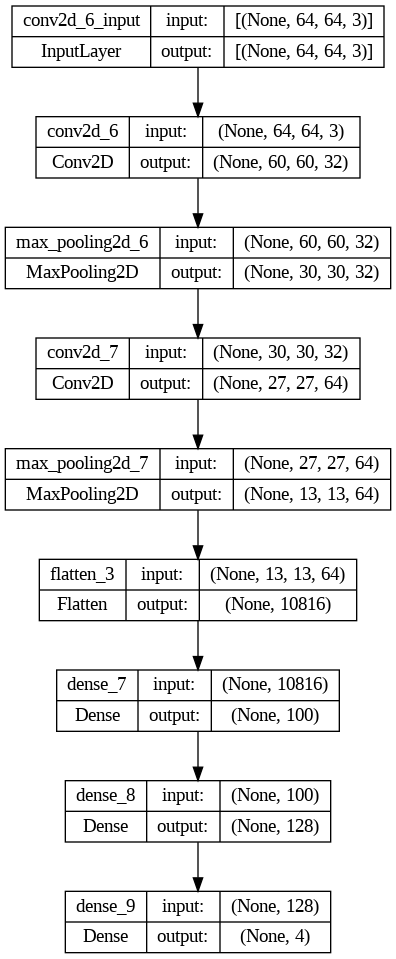

In [12]:
from tensorflow.keras.utils import plot_model

# Plot the model
plot_model(model_12, to_file='model.png', show_shapes=True, show_layer_names=True)


In [19]:
# Get the true labels from the generator
y_true = train_generator.classes

# Use the model to predict the probabilities for each class
y_pred_prob = model_12.predict(train_generator)

# Convert the probabilities to class labels
y_pred_classes = np.argmax(y_pred_prob, axis=1)

# Now you can use y_true and y_pred_classes to calculate the metrics
cm = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(cm)

print("Classification Report:")
print(classification_report(y_true, y_pred_classes))

# Convert the predictions and actual labels to binary matrix
num_classes = len(np.unique(y_true))  # get the number of unique classes
y_true_bin = to_categorical(y_true, num_classes=num_classes)
y_pred_bin = to_categorical(y_pred_classes, num_classes=num_classes)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Print the ROC curve data
for i in range(num_classes):
    print(f"ROC curve data for class {i}:")
    print(f"False Positive Rate: {fpr[i]}")
    print(f"True Positive Rate: {tpr[i]}")
    print(f"Area Under Curve: {roc_auc[i]}")


20/20 [==============================] - 10s 491ms/step
Confusion Matrix:
[[143 166]
 [129 171]]
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.46      0.49       309
           1       0.51      0.57      0.54       300

    accuracy                           0.52       609
   macro avg       0.52      0.52      0.51       609
weighted avg       0.52      0.52      0.51       609

ROC curve data for class 0:
False Positive Rate: [0.   0.43 1.  ]
True Positive Rate: [0.         0.46278317 1.        ]
Area Under Curve: 0.5163915857605178
ROC curve data for class 1:
False Positive Rate: [0.         0.53721683 1.        ]
True Positive Rate: [0.   0.57 1.  ]
Area Under Curve: 0.5163915857605178


In [17]:
model_12.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 60, 60, 32)        2432      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 27, 27, 64)        32832     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 10816)             0         
                                                                 
 dense_7 (Dense)             (None, 100)              

In [10]:
# @title
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    classes=classes)

# Define the model
model_12 = Sequential()
model_12.add(Conv2D(32, (5, 5), activation='relu', input_shape=(64, 64, 3)))
model_12.add(MaxPooling2D(pool_size=(2, 2)))
model_12.add(Conv2D(64, (4, 4), activation='relu'))
model_12.add(MaxPooling2D(pool_size=(2, 2)))
model_12.add(Flatten())
model_12.add(Dense(100))
# model.add(Dense(64, activation='tanh'))  # 'tanh' activation
# model.add(Dropout(0.5))
model_12.add(Dense(128, activation='relu'))
model_12.add(Dense(4, activation='softmax'))

# Compile the model
model_12.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_12.fit(train_generator, epochs=20, validation_data=validation_generator)

Found 609 images belonging to 4 classes.
Epoch 1/20
20/20 [==============================] - 20s 978ms/step - loss: 0.7479 - accuracy: 0.5583 - val_loss: 0.4211 - val_accuracy: 0.7637
Epoch 2/20
20/20 [==============================] - 17s 897ms/step - loss: 0.5346 - accuracy: 0.7258 - val_loss: 0.3729 - val_accuracy: 0.8352
Epoch 3/20
20/20 [==============================] - 17s 842ms/step - loss: 0.4886 - accuracy: 0.7603 - val_loss: 0.3706 - val_accuracy: 0.8022
Epoch 4/20
20/20 [==============================] - 17s 817ms/step - loss: 0.4921 - accuracy: 0.7422 - val_loss: 0.3762 - val_accuracy: 0.8022
Epoch 5/20
20/20 [==============================] - 19s 978ms/step - loss: 0.4903 - accuracy: 0.7783 - val_loss: 0.3939 - val_accuracy: 0.7802
Epoch 6/20
20/20 [==============================] - 16s 797ms/step - loss: 0.4578 - accuracy: 0.7668 - val_loss: 0.3616 - val_accuracy: 0.8187
Epoch 7/20
20/20 [==============================] - 16s 814ms/step - loss: 0.5165 - accuracy: 0.7192 